In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 1.
# Introduction to geospatial data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) Vector and raster data types
# (2) Geographic and projected coordinate systems
# (3) Basic plots 


# Links showing examples for plotting and calculating distances using different methods
#  https://stackoverflow.com/questions/57291951/how-to-calculate-geodesic-distance-along-a-path-lat-lon-points-at-once
#  https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac
#  https://www.earthdatascience.org/
#  http://www.naturalearthdata.com/

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Exercise 1.
# Explore, display, work with vector data
#
# https://geopandas.org/index.html
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# set the filepath and load
#   http://www.geoportale.regione.lombardia.it
shapefile = "./REGIONE_LOMBARDIA/Comuni_2012.shp"

#reading the file stored in variable fp
comuni = gpd.read_file(shapefile)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
print (comuni.head())

                               CLASSREF BELFIORE COD_ISTAT  \
0  1e9d907b-5ca6-413c-a9a9-323051719aa5     H870  03020056   
1  505fc2d5-bb59-4147-ab77-5952916b071d     D204  03012060   
2  60f2e97e-585c-4386-b2b1-fd7f9d7814a3     A569  03017009   
3  b4258bf7-aa93-4ded-8f23-76de750e4efc     D924  03017076   
4  41a75e50-73bf-4a3e-85ec-673b6e213b2f     H410  03017162   

                    NOME_COM COD_PRO NOME_PRO COD_CMO              NOME_CMO  \
0  SAN GIACOMO DELLE SEGNATE      20  MANTOVA    None                  None   
1                    CUNARDO      12   VARESE    ZO22             PIAMBELLO   
2              BAGNOLO MELLA      17  BRESCIA    None                  None   
3                   GARGNANO      17  BRESCIA    ZO02  ALTO GARDA BRESCIANO   
4                ROCCAFRANCA      17  BRESCIA    None                  None   

   COD_ASL NOME_ASL COD_REG   NOME_REG    SHAPE_AREA     SHAPE_LEN  \
0        7  MANTOVA      03  LOMBARDIA  1.663635e+07  23465.214759   
1       14  

<AxesSubplot:>

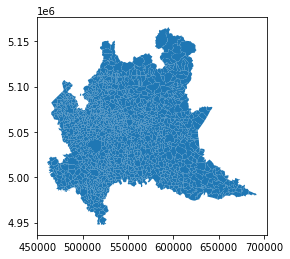

In [4]:
# Now plot the data
# Make the simplest of the plots >>> .plot()
comuni.plot()

In [5]:
# We have seen two levels of information: (A) shapes and (B) their attributes


# (A) Let's start focussing on the shapes (polygons)
# In the map above, we have numbers on both x & y axes; what do they represent?
# They represent the x,y coordinates. They refer to an origin, in a given coordinate system.

# https://geopandas.org/projections.html#coordinate-reference-systems

# What's the coordinate system of our data ?
print(comuni.crs)

epsg:32632


/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

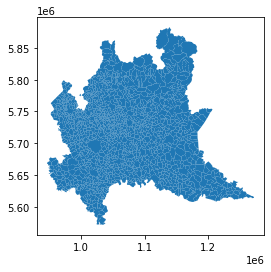

In [6]:
# Here we can see what that means:
#   http://epsg.io/
#   https://proj.org/operations/projections/tmerc.html
#   https://spatialreference.org

# Now let's change projection
lombardia = comuni.to_crs({'init': 'epsg:3857'})  
lombardia.plot()

In [7]:
# Let's change back to the original
# lombardia = comuni.to_crs({'init': 'epsg:32632'}) 

/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


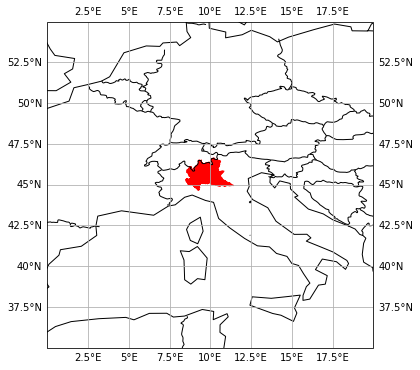

In [8]:
# Let's place Lombardy in a broader context
# Make a more elaborate plot >>> use matplotib & cartopy

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

fig = plt.figure(figsize=(9,6))  # x,y(inches)
plt.title('Lombardy region')

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_global()

ax.add_geometries(lombardia['geometry'], crs=ccrs.epsg('3857'), facecolor='red', edgecolor='red')
#ax.add_geometries(lombardia['geometry'], crs=ccrs.epsg('32632'), facecolor='red', edgecolor='orange')
#ax.add_geometries(comuni['geometry'], crs=ccrs.epsg('32632'), facecolor='red', edgecolor='cyan')
#ax.add_geometries(comuni['geometry'], crs=ccrs.epsg('3857'), facecolor='red', edgecolor='blue')

#ax.set_xlim(8,12) 
#ax.set_ylim(44,47) 
#states = NaturalEarthFeature(category="cultural", scale="10m", facecolor="none", name="admin_1_states_provinces_shp")
#ax.add_feature(states, linewidth=.5, edgecolor="black")

ax.set_xlim(0,20) 
ax.set_ylim(35,55)  
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='110m')  # in fact we are loading a shapefile here (110,50m,10m)
#ax.add_feature(cfeature.COASTLINE)

ax.gridlines(draw_labels=True)

#plt.show()

In [9]:
plt.savefig('Module1_plot01.pdf')
plt.close()

In [10]:
# (B) Now let's focus on the attributes

In [11]:
# How many provinces are there in Lombardy ?
print(comuni.NOME_PRO.unique())

['MANTOVA' 'VARESE' 'BRESCIA' 'COMO' 'CREMONA' 'LECCO' 'BERGAMO' 'MILANO'
 'SONDRIO' 'MONZA E DELLA BRIANZA' 'LODI' 'PAVIA']


In [12]:
print(len(comuni.NOME_PRO.unique()))

12


<AxesSubplot:>

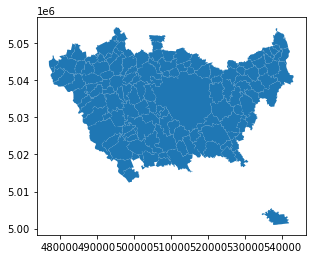

In [13]:
# Just focus on the province of Milano
milano = comuni[comuni.NOME_PRO=='MILANO']
milano.plot()

In [14]:
# What's the areal extension of cities in the province of Milano ?
#   Let's exploit the geometry of the polygons in out vector data layer
#   https://geopandas.org/data_structures.html
print(milano['geometry'].area)

34      1.467688e+07
116     6.129621e+06
121     1.396943e+07
139     1.874333e+07
147     5.695968e+06
            ...     
1279    6.129683e+06
1280    1.866920e+07
1281    1.499396e+07
1282    2.041984e+07
1283    3.340924e+06
Length: 134, dtype: float64


<AxesSubplot:>

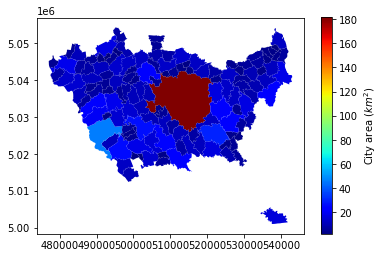

In [15]:
# Let's show this piece of information on a map
milano.plot(column=milano['geometry'].area/1e6, cmap='jet', legend=True,legend_kwds={'label': 'City area ($km^2$)'})

In [16]:
print(comuni.head())

                               CLASSREF BELFIORE COD_ISTAT  \
0  1e9d907b-5ca6-413c-a9a9-323051719aa5     H870  03020056   
1  505fc2d5-bb59-4147-ab77-5952916b071d     D204  03012060   
2  60f2e97e-585c-4386-b2b1-fd7f9d7814a3     A569  03017009   
3  b4258bf7-aa93-4ded-8f23-76de750e4efc     D924  03017076   
4  41a75e50-73bf-4a3e-85ec-673b6e213b2f     H410  03017162   

                    NOME_COM COD_PRO NOME_PRO COD_CMO              NOME_CMO  \
0  SAN GIACOMO DELLE SEGNATE      20  MANTOVA    None                  None   
1                    CUNARDO      12   VARESE    ZO22             PIAMBELLO   
2              BAGNOLO MELLA      17  BRESCIA    None                  None   
3                   GARGNANO      17  BRESCIA    ZO02  ALTO GARDA BRESCIANO   
4                ROCCAFRANCA      17  BRESCIA    None                  None   

   COD_ASL NOME_ASL COD_REG   NOME_REG    SHAPE_AREA     SHAPE_LEN  \
0        7  MANTOVA      03  LOMBARDIA  1.663635e+07  23465.214759   
1       14  

In [17]:
# Now let's try to merge this geodataframe with external data, for instance a table

# First, import a data table into a pandas df
tab_pop = pd.read_csv('./REGIONE_LOMBARDIA/Lombardia_Pop2011_2014.csv',sep=',',encoding= 'unicode_escape')
print(tab_pop.head())

    Codice                Comune  Cod_prov Provincia  Pop2011  Pop2014
0  3017064               CORZANO        17   BRESCIA   1358.0   1427.0
1  3017167               RUDIANO        17   BRESCIA   5861.0   5822.0
2  3017201  VILLANUOVA SUL CLISI        17   BRESCIA   5855.0   5778.0
3  3017084                  IRMA        17   BRESCIA    152.0    128.0
4  3017102     MANERBA DEL GARDA        17   BRESCIA   4985.0   5290.0


In [18]:
# Then, let's join it with the geodatabase "comuni"
# https://geopandas.org/mergingdata.html#
#   In order to make a join, we need a common field: let that be the town code. 
#   Let's rename it in the table so that the attribute names match
tab_pop.rename(columns={'Codice':'COD_ISTAT'}, inplace=True)

In [19]:
tab_pop.COD_ISTAT=tab_pop.COD_ISTAT.astype(int)
comuni.COD_ISTAT=comuni.COD_ISTAT.astype(int)
comuni = comuni.merge(tab_pop, on='COD_ISTAT')
print(comuni.head())

                               CLASSREF BELFIORE  COD_ISTAT  \
0  1e9d907b-5ca6-413c-a9a9-323051719aa5     H870    3020056   
1  505fc2d5-bb59-4147-ab77-5952916b071d     D204    3012060   
2  60f2e97e-585c-4386-b2b1-fd7f9d7814a3     A569    3017009   
3  b4258bf7-aa93-4ded-8f23-76de750e4efc     D924    3017076   
4  41a75e50-73bf-4a3e-85ec-673b6e213b2f     H410    3017162   

                    NOME_COM COD_PRO NOME_PRO COD_CMO              NOME_CMO  \
0  SAN GIACOMO DELLE SEGNATE      20  MANTOVA    None                  None   
1                    CUNARDO      12   VARESE    ZO22             PIAMBELLO   
2              BAGNOLO MELLA      17  BRESCIA    None                  None   
3                   GARGNANO      17  BRESCIA    ZO02  ALTO GARDA BRESCIANO   
4                ROCCAFRANCA      17  BRESCIA    None                  None   

   COD_ASL NOME_ASL COD_REG   NOME_REG    SHAPE_AREA     SHAPE_LEN  \
0        7  MANTOVA      03  LOMBARDIA  1.663635e+07  23465.214759   
1     

In [20]:
# More ideas for practising:
# - calculate the trends in population change (%) between 2014 and 2011
# - plot the provinces in different colors
# - show with colorscale the distance between towns in Lombardia and Milano
# - play with datasets in http://www.geoportale.regione.lombardia.it

# Prima richiesta

In [21]:
comuni['diff_pop_perc'] = round((comuni['Pop2014'] - comuni['Pop2011'])/comuni['Pop2011'],2)

<AxesSubplot:>

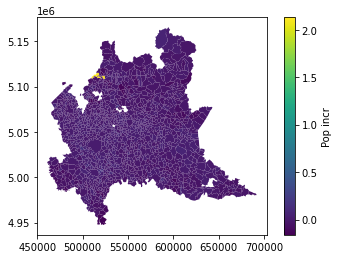

In [26]:
comuni.plot(column=comuni['diff_pop_perc'], legend=True,legend_kwds={'label': 'Pop incr'})

In [32]:
comuni.loc[comuni['diff_pop_perc'].idxmax()]['Comune']

'GRAVEDONA ED UNITI'

# Seconda richiesta

<AxesSubplot:>

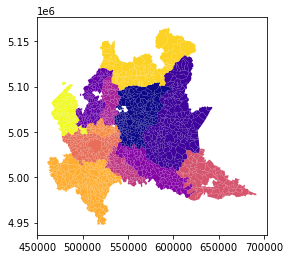

In [39]:
comuni.plot(column = comuni.Provincia, cmap = 'plasma')

# Terza

In [75]:
milano = comuni.loc[comuni['Comune'] == "MILANO"]
milano_point = milano.centroid

In [83]:
milano_point

1119    POINT (513534.015 5034997.437)
dtype: geometry

In [77]:
comuni.loc[comuni['Comune'] == "MONZA"].geometry

554    POLYGON ((523230.331 5050959.052, 523237.831 5...
Name: geometry, dtype: geometry

In [79]:
comuni.centroid[554].distance(comuni.centroid[1119])

203717.22665993232

In [80]:
comuni.centroid

0       POINT (658970.590 4981323.909)
1       POINT (484703.190 5086830.220)
2       POINT (592585.900 5030461.336)
3       POINT (627797.568 5062650.125)
4       POINT (571672.905 5033840.144)
                     ...              
1517    POINT (529180.695 4995486.109)
1518    POINT (535363.574 4995044.055)
1519    POINT (526266.318 4996191.467)
1520    POINT (522124.266 4995586.738)
1521    POINT (523974.279 4999104.476)
Length: 1522, dtype: geometry

In [84]:
comuni['distanza'] = comuni.centroid.apply(lambda g: comuni.centroid[1119].distance(g))

In [88]:
comuni['distanza'].isna().sum(axis = 0)

0

<AxesSubplot:>

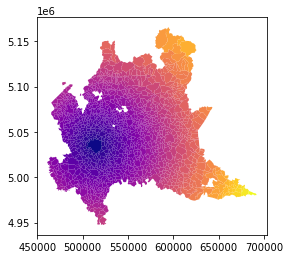

In [89]:
comuni.plot(column = comuni['distanza'], cmap = 'plasma')